In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("Student_Marks.csv")
data.head(20)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [3]:
data.shape

(100, 3)

In [4]:
print("#Jumlah dataset = " +str(len(data.index)))

#Jumlah dataset = 100


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path="Student_Marks.csv"
df = pd.read_csv(path)

In [7]:
student_marks = df['Marks']

In [8]:
mean = student_marks.mean()
median = student_marks.median()
modus = student_marks.mode()

In [9]:
print('Mean:',mean,'nMedian: ',median,'nModus: ',modus[0])

Mean: 24.417689999999993 nMedian:  20.0595 nModus:  5.609


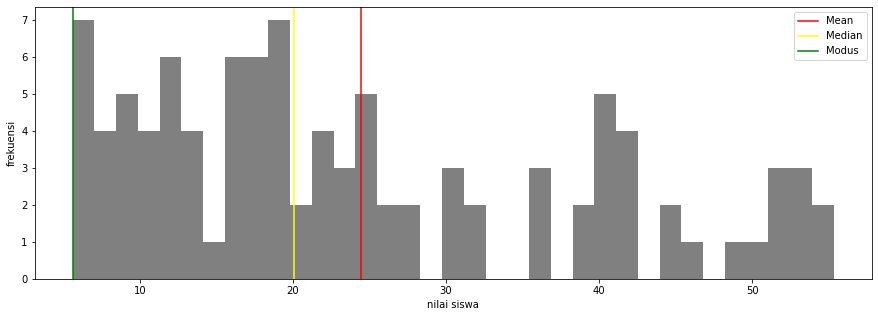

In [10]:
plt.figure(figsize=(15,5))
plt.hist(student_marks,bins=35,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(modus[0],color='green',label='Modus')
plt.xlabel('nilai siswa')
plt.ylabel('frekuensi')
plt.legend()
plt.show()

In [11]:
maks = student_marks.max()
minm = student_marks.min()
jarak = maks - minm
varians = student_marks.var()
simp_baku = student_marks.std()
koef_var = simp_baku / mean

In [12]:
# menampilkan ukuran nilai deviasi
print('Nilai tertinggi: ',maks,'nNilai terendah: ',minm,'nRange: ',jarak, 'nVarians: ',varians,'nSimpangan Baku: ', simp_baku,'nKoefisien Variasi: ',koef_var)


Nilai tertinggi:  55.299 nNilai terendah:  5.609 nRange:  49.69 nVarians:  205.23996548878785 nSimpangan Baku:  14.326198570757976 nKoefisien Variasi:  0.5867139180961827


In [13]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


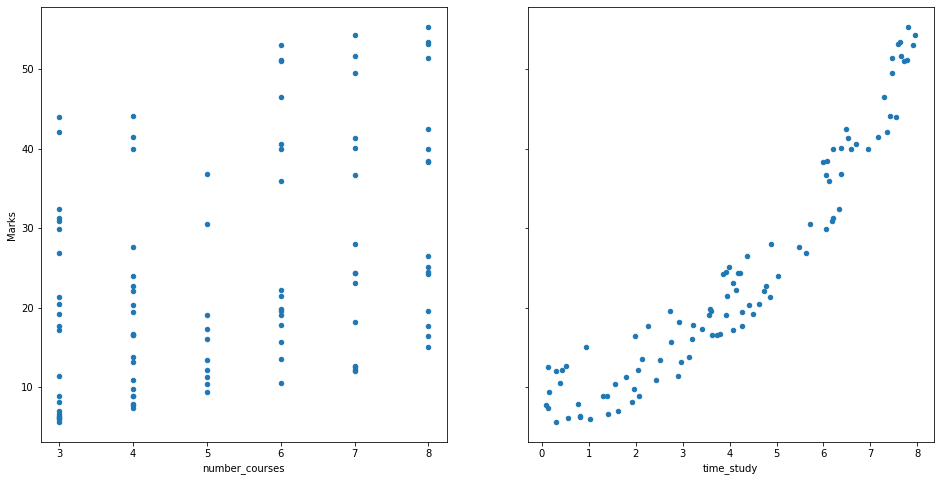

In [14]:
fig, axs = plt.subplots(1, 2, sharey=True) 
data.plot(kind='scatter', x='number_courses', y='Marks', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='time_study', y='Marks', ax=axs[1])

In [15]:
feature_names=['number_courses','time_study']
X=data[feature_names]
X
y=data.Marks

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [18]:
Linreg=LinearRegression()

In [19]:
Linreg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=Linreg.predict(X_test)
print (y_pred)

[47.55733119 18.8722928  38.61601837 20.30802166 41.89010291 39.88521011
 16.10829478 38.89536275 25.04838069 15.78792957 26.67628467 44.67171758
 47.88939848  4.85320607 25.98160445 13.48830959  8.80781493 10.91916049
 44.96276404 36.65069951 16.96460449  7.30029964 37.62884479 23.29474045
 29.10186089]


In [21]:
import numpy as np
msk = np.random.rand(len(data)) < 0.8
d1=data.fillna(data.mean())
train = d1[msk]
test = d1[~msk]

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_X = np.asanyarray(train[['number_courses','time_study']])
train_y = np.asanyarray(train[['Marks']])
regr.fit (train_X,train_y)

print('Coefficient',regr.coef_)
print ('Intercept',regr.intercept_)

Coefficient [[1.86580875 5.45947873]]
Intercept [-7.65341131]


In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.62250361905766


In [24]:
import statsmodels.api as sm

model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Marks   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2235.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):                    1.76e-82
Time:                        05:03:55   Log-Likelihood:                         -284.00
No. Observations:                 100   AIC:                                      572.0
Df Residuals:                      98   BIC:                                      577.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
number_courses     0.8403      0.143      5.862      0.000       0.556       1.125
time_study         5.0643      0.170     29.803      0.000       4.727       5.402
==============================================================================
Omnibus:                        9.324   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.550
Skew:                           0.643   Prob(JB):                       0.0139
Kurtosis:                       2.369   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     764.8
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           4.09e-60
Time:                        05:04:02   Log-Likelihood:                -266.62
No. Observations:                 100   AIC:                             539.2
Df Residuals:                      97   BIC:                             547.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.4563      1.174     -6.349      0.000      -9.787      -5.125
number_courses     1.8641      0.202      9.243      0.000       1.464       2.264
time_study         5.3992      0.153     35.303      0.000       5.096       5.703
==============================================================================
Omnibus:                       29.529   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.956
Skew:                           0.526   Prob(JB):                      0.00689
Kurtosis:                       1.867   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

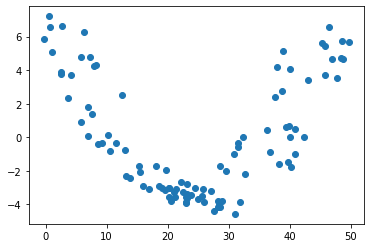

In [26]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Marks~number_courses+time_study', data=data).fit()
lm
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [27]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = smf.ols(formula = 'Marks~number_courses+time_study', data = data).fit()
y,X = dmatrices ('Marks~number_courses+time_study', data = data, return_type ="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

[11.042136877869721, 1.0437988449385478, 1.0437988449385478]
